In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import lightgbm as lgb
import joblib
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1.数据读取

In [76]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [77]:
train_df.head()

,ID,区域1,区域2,区域3,街道,上传日期,房屋租金,服务费,供暖费用,电力基础价格,...,邮政编码,房间数量,所处楼层,建筑楼层,有花园,最后翻新年份,是新建筑,建成年份,价格趋势,上传图片数
0,0,0,0,0,0,Oct19,569.0,140.0,NaN,NaN,...,0,3.0,2.0,3.0,False,NaN,False,1971.0,4.62,6
1,1,1,1,1,1,Oct19,560.0,120.0,NaN,NaN,...,1,2.0,NaN,NaN,False,NaN,False,1967.0,5.95,7
2,2,0,2,2,2,Feb20,720.0,NaN,NaN,NaN,...,2,1.0,1.0,1.0,False,NaN,False,2018.0,3.83,10
3,3,2,3,3,3,May19,695.0,153.0,NaN,NaN,...,3,2.0,2.0,3.0,False,NaN,False,1972.0,5.24,7
4,4,3,4,4,1,Oct19,1200.0,350.0,NaN,NaN,...,4,4.5,2.0,2.0,True,NaN,False,NaN,5.63,14


# 2.数据分析

In [78]:
train_df['房屋租金'].max()

9999999.0

In [79]:
train_df[train_df['房屋租金'] > train_df['房屋租金'].quantile(0.999)].head(1)

,ID,区域1,区域2,区域3,街道,上传日期,房屋租金,服务费,供暖费用,电力基础价格,...,邮政编码,房间数量,所处楼层,建筑楼层,有花园,最后翻新年份,是新建筑,建成年份,价格趋势,上传图片数
1575,1575,9,16,268,1,Feb20,5500.0,500.0,NaN,NaN,...,947,4.0,NaN,2.0,False,NaN,False,NaN,4.58,13


In [80]:
train_df['房屋租金'].quantile(0.999)

4950.0

In [81]:
train_df[train_df['房屋租金'] > train_df['房屋租金'].quantile(0.999)]

,ID,区域1,区域2,区域3,街道,上传日期,房屋租金,服务费,供暖费用,电力基础价格,...,邮政编码,房间数量,所处楼层,建筑楼层,有花园,最后翻新年份,是新建筑,建成年份,价格趋势,上传图片数
1575,1575,9,16,268,1,Feb20,5500.00,500.00,NaN,NaN,...,947,4.0,NaN,2.0,False,NaN,False,NaN,4.58,13
2070,2070,2,29,403,1,Sep18,10700.00,2200.00,NaN,90.76,...,419,4.0,4.0,5.0,False,2010.0,False,2008.0,7.43,5
4002,4002,9,16,268,1,Feb20,5500.00,500.00,NaN,NaN,...,947,4.0,NaN,2.0,True,2019.0,False,1870.0,4.58,17
4170,4170,2,29,31,1,May19,5980.00,660.00,NaN,NaN,...,31,5.0,NaN,6.0,False,NaN,False,2016.0,7.04,11
4482,4482,2,242,1197,1,Sep18,4961.00,825.00,NaN,71.43,...,1260,5.0,NaN,NaN,True,NaN,False,2001.0,4.80,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194777,194777,8,11,828,1,Oct19,5402.09,625.00,NaN,NaN,...,862,4.5,3.0,3.0,True,NaN,False,NaN,4.17,16
194916,194916,9,16,1677,1,May19,6250.00,600.00,NaN,NaN,...,277,6.5,3.0,NaN,False,NaN,False,NaN,5.87,14
195239,195239,9,16,262,43577,May19,5950.00,340.00,340.00,NaN,...,270,5.5,2.0,4.0,False,2018.0,False,1914.0,5.30,12
195554,195554,2,29,519,1,May19,5700.00,800.00,NaN,NaN,...,1791,6.0,NaN,3.0,False,2018.0,False,2009.0,6.96,52


## 2.1 缺失值分析

In [82]:
train_df.isnull().mean(0)

ID        0.000000
区域1       0.000000
区域2       0.000000
区域3       0.000000
街道        0.000000
上传日期      0.000000
房屋租金      0.000000
服务费       0.025610
供暖费用      0.682465
电力基础价格    0.825970
有阳台       0.000000
没有停车位     0.654085
有厨房       0.000000
有地窖       0.000000
居住面积      0.000000
房屋状况      0.000015
内饰质量      0.007260
可带宠物      0.426480
加热类型      0.000595
有电梯       0.000000
房屋类型      0.021005
邮政编码      0.000000
房间数量      0.000000
所处楼层      0.191320
建筑楼层      0.363355
有花园       0.000000
最后翻新年份    0.699170
是新建筑      0.000000
建成年份      0.212390
价格趋势      0.006605
上传图片数     0.000000
dtype: float64

## 2.2 相关性分析

In [83]:
train_df.corr()['房屋租金']

ID       -0.000530
区域1      -0.002137
区域2       0.002115
区域3       0.003195
街道        0.002761
房屋租金      1.000000
服务费       0.627498
供暖费用      0.114817
电力基础价格    0.003633
有阳台       0.002828
没有停车位     0.004404
有厨房       0.004713
有地窖      -0.002857
居住面积      0.013557
房屋状况     -0.001372
内饰质量     -0.001297
加热类型      0.001421
有电梯       0.005293
房屋类型      0.000681
邮政编码      0.009896
房间数量      0.003324
所处楼层      0.011161
建筑楼层      0.008226
有花园      -0.000480
最后翻新年份    0.153241
是新建筑      0.005062
建成年份      0.143588
价格趋势      0.010815
上传图片数     0.003238
Name: 房屋租金, dtype: float64

## 2.3 探索性分析

In [84]:
ss = train_df.groupby(['区域1'])['房屋租金'].mean()
ss

区域1
0      602.096708
1     1053.480464
2     1020.160730
3      516.632730
4     9812.108292
5      439.607234
6      600.737776
7      684.906067
8     1167.669803
9      973.537653
10     386.847067
11     620.689502
12     369.322998
13     646.775330
14    1195.063434
15     422.101682
Name: 房屋租金, dtype: float64

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0, flags=flags)


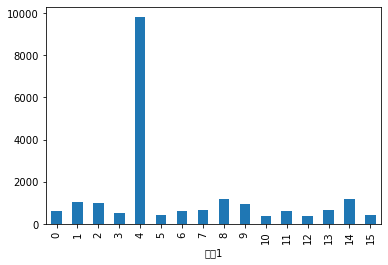

In [85]:
train_df.groupby(['区域1'])['房屋租金'].mean().plot(kind='bar')

In [86]:
train_df.groupby(['有花园'])['房屋租金'].mean()

有花园
False    710.410061
True     683.139171
Name: 房屋租金, dtype: float64

## 2.4 特征编码

In [87]:
train_df.dtypes

ID          int64
区域1         int64
区域2         int64
区域3         int64
街道          int64
上传日期       object
房屋租金      float64
服务费       float64
供暖费用      float64
电力基础价格    float64
有阳台          bool
没有停车位     float64
有厨房          bool
有地窖          bool
居住面积      float64
房屋状况      float64
内饰质量      float64
可带宠物       object
加热类型      float64
有电梯          bool
房屋类型      float64
邮政编码        int64
房间数量      float64
所处楼层      float64
建筑楼层      float64
有花园          bool
最后翻新年份    float64
是新建筑         bool
建成年份      float64
价格趋势      float64
上传图片数       int64
dtype: object

In [88]:
train_df['上传日期']

0         Oct19
1         Oct19
2         Feb20
3         May19
4         Oct19
          ...  
199995    May19
199996    Feb20
199997    Sep18
199998    Oct19
199999    May19
Name: 上传日期, Length: 200000, dtype: object

In [89]:
train_df['上传日期_day'] = train_df['上传日期'].apply(lambda x: int(x[-2:]))
test_df['上传日期_day'] = test_df['上传日期'].apply(lambda x: int(x[-2:]))

In [90]:
train_df['上传日期_month'] = train_df['上传日期'].apply(lambda x: x[:2])
test_df['上传日期_month'] = test_df['上传日期'].apply(lambda x: x[:2])

In [91]:
train_df['上传日期_month'] = train_df['上传日期_month'].apply(lambda x: ['Fe', 'Ma', 'Oc', 'Se'].index(x))
test_df['上传日期_month'] = test_df['上传日期_month'].apply(lambda x: ['Fe', 'Ma', 'Oc', 'Se'].index(x))

In [92]:
train_df.drop(['上传日期'], axis=1, inplace=True)
test_df.drop(['上传日期'], axis=1, inplace=True)

In [93]:
train_df['可带宠物'] = train_df['可带宠物'].map({'negotiable': 0.5, 'no': 0, 'yea': 1})
test_df['可带宠物'] = test_df['可带宠物'].map({'negotiable': 0.5, 'no': 0, 'yea': 1})

In [94]:
train_df

,ID,区域1,区域2,区域3,街道,房屋租金,服务费,供暖费用,电力基础价格,有阳台,...,所处楼层,建筑楼层,有花园,最后翻新年份,是新建筑,建成年份,价格趋势,上传图片数,上传日期_day,上传日期_month
0,0,0,0,0,0,569.0,140.0,NaN,NaN,True,...,2.0,3.0,False,NaN,False,1971.0,4.62,6,19,2
1,1,1,1,1,1,560.0,120.0,NaN,NaN,False,...,NaN,NaN,False,NaN,False,1967.0,5.95,7,19,2
2,2,0,2,2,2,720.0,NaN,NaN,NaN,False,...,1.0,1.0,False,NaN,False,2018.0,3.83,10,20,0
3,3,2,3,3,3,695.0,153.0,NaN,NaN,True,...,2.0,3.0,False,NaN,False,1972.0,5.24,7,19,1
4,4,3,4,4,1,1200.0,350.0,NaN,NaN,True,...,2.0,2.0,True,NaN,False,NaN,5.63,14,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,6,71,4704,536,220.0,120.0,NaN,NaN,False,...,NaN,NaN,True,NaN,False,1710.0,2.05,1,19,1
199996,199996,8,11,157,2531,534.0,131.0,NaN,NaN,True,...,2.0,6.0,False,NaN,False,1969.0,8.36,7,20,0
199997,199997,5,9,596,11079,225.0,82.0,43.0,90.76,True,...,0.0,NaN,False,NaN,False,1980.0,5.66,10,18,3
199998,199998,1,262,5697,431,1142.0,228.0,NaN,NaN,True,...,2.0,3.0,False,2017.0,False,NaN,2.92,11,19,2


In [95]:
train_df.isnull().sum()

ID                 0
区域1                0
区域2                0
区域3                0
街道                 0
房屋租金               0
服务费             5122
供暖费用          136493
电力基础价格        165194
有阳台                0
没有停车位         130817
有厨房                0
有地窖                0
居住面积               0
房屋状况               3
内饰质量            1452
可带宠物           92921
加热类型             119
有电梯                0
房屋类型            4201
邮政编码               0
房间数量               0
所处楼层           38264
建筑楼层           72671
有花园                0
最后翻新年份        139834
是新建筑               0
建成年份           42478
价格趋势            1321
上传图片数              0
上传日期_day           0
上传日期_month         0
dtype: int64

In [96]:
for col in train_df.select_dtypes(bool).columns:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

In [97]:
train_df.dtypes

ID              int64
区域1             int64
区域2             int64
区域3             int64
街道              int64
房屋租金          float64
服务费           float64
供暖费用          float64
电力基础价格        float64
有阳台             int32
没有停车位         float64
有厨房             int32
有地窖             int32
居住面积          float64
房屋状况          float64
内饰质量          float64
可带宠物          float64
加热类型          float64
有电梯             int32
房屋类型          float64
邮政编码            int64
房间数量          float64
所处楼层          float64
建筑楼层          float64
有花园             int32
最后翻新年份        float64
是新建筑            int32
建成年份          float64
价格趋势          float64
上传图片数           int64
上传日期_day        int64
上传日期_month      int64
dtype: object

In [98]:
# 数据平滑处理 -- log1p( ) 和 exmp1( )
# 1.  数据预处理时首先可以对偏度比较大的数据用log1p函数进行转化，使其更加服从高斯分布，此步处理可能会使我们后续的分类结果得到一个好的结果。
# 2. 平滑问题很容易处理掉，导致模型的结果达不到一定的标准，log1p( )能够避免复值得问题 — 复值指一个自变量对应多个因变量
# log1p( ) 的使用就像是一个数据压缩到了一个区间，与数据的标准类似。其逆运算就是expm1的函
# 由于使用的log1p（）对数据进行了压缩，最后需要将预测出的平滑数据进行一个还原，而还原过程就是log1p的逆运算expm1.
# log1p = log（x+1）
# 当x较大时直接计算，当x较小时用泰勒展开式计算

train_df['房屋租金'] = np.log1p(train_df['房屋租金'])

In [99]:
train_df['区域1_租金价格'] = train_df['区域1'].map(train_df.groupby(['区域1'])['房屋租金'].mean())
test_df['区域1_租金价格'] = test_df['区域1'].map(train_df.groupby(['区域1'])['房屋租金'].mean())

train_df['区域2_租金价格'] = train_df['区域2'].map(train_df.groupby(['区域2'])['房屋租金'].mean())
test_df['区域2_租金价格'] = test_df['区域2'].map(train_df.groupby(['区域2'])['房屋租金'].mean())

In [100]:
train_df['邮政编码_租金价格'] = train_df['邮政编码'].map(train_df.groupby(['邮政编码'])['房屋租金'].mean())
test_df['邮政编码_租金价格'] = test_df['邮政编码'].map(train_df.groupby(['邮政编码'])['房屋租金'].mean())

In [101]:
train_df['所处楼层_div'] = train_df['所处楼层'] / train_df['建筑楼层']
test_df['所处楼层_div'] = test_df['所处楼层'] / test_df['建筑楼层']

In [102]:
train_df['所处楼层_max'] = (train_df['所处楼层'] == train_df['建筑楼层']).astype(int)
test_df['所处楼层_max'] = (test_df['所处楼层'] == test_df['建筑楼层']).astype(int)

In [103]:
train_df['居住面积_mean'] = train_df['居住面积'] / train_df['房间数量']
test_df['居住面积_mean'] = test_df['居住面积'] / test_df['房间数量']

In [104]:
train_df['居住面积_mean']

0         24.980000
1         32.000000
2         35.000000
3         30.610000
4         28.222222
            ...    
199995    20.000000
199996    29.660000
199997    35.170000
199998    38.033333
199999    25.000000
Name: 居住面积_mean, Length: 200000, dtype: float64

In [105]:
train_df['建成年龄'] = 2022 - train_df['建成年份']
test_df['建成年龄'] = 2022 - test_df['建成年份']

train_df['翻新年龄'] = 2022 - train_df['最后翻新年份']
test_df['翻新年龄'] = 2022 - test_df['最后翻新年份']

# 3.搭建模型

In [106]:
for col in ['区域1', '区域2', '区域3', '街道', '房屋类型', '房屋状况', '可带宠物', '邮政编码']:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [107]:
train_df.dtypes

ID               int64
区域1           category
区域2           category
区域3           category
街道            category
房屋租金           float64
服务费            float64
供暖费用           float64
电力基础价格         float64
有阳台              int32
没有停车位          float64
有厨房              int32
有地窖              int32
居住面积           float64
房屋状况          category
内饰质量           float64
可带宠物          category
加热类型           float64
有电梯              int32
房屋类型          category
邮政编码          category
房间数量           float64
所处楼层           float64
建筑楼层           float64
有花园              int32
最后翻新年份         float64
是新建筑             int32
建成年份           float64
价格趋势           float64
上传图片数            int64
上传日期_day         int64
上传日期_month       int64
区域1_租金价格       float64
区域2_租金价格       float64
邮政编码_租金价格      float64
所处楼层_div       float64
所处楼层_max         int32
居住面积_mean      float64
建成年龄           float64
翻新年龄           float64
dtype: object

In [108]:
train_df.isnull().sum()

ID                 0
区域1                0
区域2                0
区域3                0
街道                 0
房屋租金               0
服务费             5122
供暖费用          136493
电力基础价格        165194
有阳台                0
没有停车位         130817
有厨房                0
有地窖                0
居住面积               0
房屋状况               3
内饰质量            1452
可带宠物           92921
加热类型             119
有电梯                0
房屋类型            4201
邮政编码               0
房间数量               0
所处楼层           38264
建筑楼层           72671
有花园                0
最后翻新年份        139834
是新建筑               0
建成年份           42478
价格趋势            1321
上传图片数              0
上传日期_day           0
上传日期_month         0
区域1_租金价格           0
区域2_租金价格           0
邮政编码_租金价格          0
所处楼层_div       81878
所处楼层_max           0
居住面积_mean          0
建成年龄           42478
翻新年龄          139834
dtype: int64

In [109]:
# 模型交叉验证
def run_model_cv(model, kf, X_tr, y, X_te, cate_col=None):
    train_pred = np.zeros( len(X_tr) )
    test_pred = np.zeros( len(X_te)  )

    cv_clf = []
    for index,[tr_idx, val_idx] in enumerate(kf.split(X_tr, y)):
        print(tr_idx)
        print(val_idx)
        print(train_pred[val_idx])
        x_tr = X_tr.iloc[tr_idx]; 
        y_tr = y.iloc[tr_idx]

        x_val = X_tr.iloc[val_idx]; 
        y_val = y.iloc[val_idx]

        call_back = [
            lgb.early_stopping(50),
        ]
        eval_set = [(x_val, y_val)]
        model.fit(x_tr, y_tr, eval_set=eval_set, callbacks=call_back, verbose=-1,
                 categorical_feature= 'auto', eval_metric= 'mae', )
        #模型保存
        joblib.dump(model, './data/model{index}.pkl'.format(index=index))

        cv_clf.append(model)

        train_pred[val_idx] = model.predict(x_val)
        test_pred += model.predict(X_te)

    test_pred /= kf.n_splits
    
    print(np.abs(np.exp(train_pred) - np.exp(y)).mean())
    return train_pred, test_pred, cv_clf

In [115]:
from sklearn.model_selection import KFold
import lightgbm as lgb

test_pred_tta = np.zeros( len(test_df)  )
for _ in range(1):
    clf = lgb.LGBMRegressor(
        max_depth=7, 
        n_estimators=4000, 
        n_jobs=-1, 
        verbose=-1,
        verbosity=-1,
        learning_rate=0.03,
        random_state=np.random.randint(100)
    )

    train_pred, test_pred, cv_clf = run_model_cv(
        clf, KFold(n_splits=5, random_state=np.random.randint(100), shuffle=True),
        train_df.drop(['ID', '房屋租金'], axis=1),
        train_df['房屋租金'],
        test_df.drop(['ID'], axis=1),
    )

    print(test_pred)
    
    test_pred_tta += test_pred

# 133.28688613802427，95.7
# 132.1 75.0

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1431]	valid_0's l1: 0.112759	valid_0's l2: 0.0379499


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[2071]	valid_0's l1: 0.111064	valid_0's l2: 0.0361345


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1769]	valid_0's l1: 0.109891	valid_0's l2: 0.034133


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1616]	valid_0's l1: 0.110819	valid_0's l2: 0.0394622


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1221]	valid_0's l1: 0.113313	valid_0's l2: 0.0424208
132.5072686996236
[6.64369239 6.42075371 6.58886223 ... 7.25611834 7.17994624 5.50914565]


In [111]:
# log1p 和 expm1 互为逆运算
# pd.DataFrame({
#     'ID': test_df['ID'],
#     '房屋租金': np.exp(test_pred_tta / 1).astype(int)
# }).to_csv('data/official-baseline.csv', index=None)

# 4.模型加载

In [112]:
rd = joblib.load('data\model0.pkl') #等价于上方训练出来的模型
rd

LGBMRegressor(learning_rate=0.03, max_depth=7, n_estimators=4000,
              random_state=34, verbose=-1, verbosity=-1)

In [113]:
xxx = rd.predict(test_df.drop(['ID'], axis=1))
np.exp(xxx / 1).astype(int)

array([6.63088142, 6.46933206, 6.58344333, ..., 7.25064304, 7.19503045,
       5.51047718])